# 排序

排序：以某种顺序从集合中放置元素的过程

对于有序和无序列表，顺序搜索是 $O(n)$\
在最坏的情况下，有序列表的二分查找是 $O(logn)$\
哈希表可以提供恒定时间搜索\
冒泡排序，选择排序和插入排序是 $O(n^2)$\
希尔排序通过排序增量子列表来改进插入排序。它落在$O(n)$和$O(logn)$之间\
归并排序是$O(logn)$，但是合并过程需要额外的空间\
快速排序是$O(logn)$，但如果分割点不在列表中间附近，可能会降级到$O(n^2)$。它不需要额外的空间

### 1 冒泡排序

需要多次遍历列表，比较相邻的项并交换那些无序的项，每次遍历列表将下一个最大的值放在其正确的位置

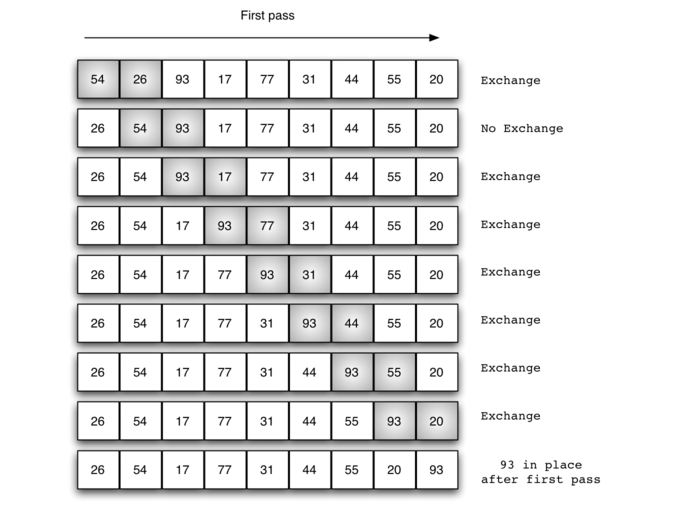\
上图中展示了冒泡排序的第一次遍历。阴影项正在比较它们是否乱序。如果在列表中有 n 个项目，则第一遍有 n-1 个项需要比较。重要的是要注意，一旦列表中的最大值是一个对的一部分，它将不断地被移动，直到遍历完成。

In [1]:
def bubbleSort(alist):
    for passnum in range(len(alist)-1,0,-1):
        for i in range(passnum):
            if alist[i]>alist[i+1]:
                temp = alist[i]
                alist[i] = alist[i+1]
                alist[i+1] = temp
alist = [54,26,93,17,77,31,44,55,20]
bubbleSort(alist)
print(alist)

[17, 20, 26, 31, 44, 54, 55, 77, 93]


### 2 选择排序

改进了冒泡排序，每次遍历列表只做一次交换\
主要做法：在每次遍历时，选择最大的剩余项，然后放置在其适当位置\
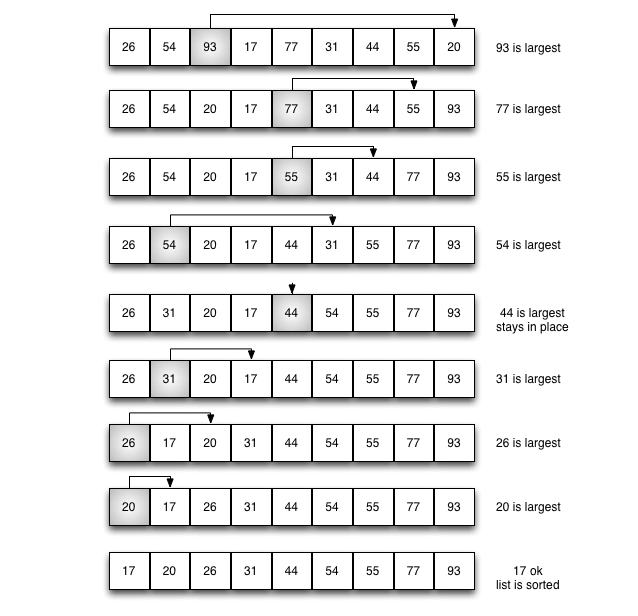

In [2]:
def selectionSort(alist):
    for fillslot in range(len(alist)-1,0,-1):
        positionofMax = 0
        for location in range(1, fillslot+1):
            if alist[location] > alist[positionofMax]:
                positionofMax = location
                
        temp = alist[fillslot]
        alist[fillslot] = alist[positionofMax]
        alist[positionofMax] = temp
alist = [54,26,93,17,77,31,44,55,20]
selectionSort(alist)
alist

[17, 20, 26, 31, 44, 54, 55, 77, 93]

### 3 插入排序

原理：它始终在列表的较低位置维护一个排序的子列表。然后将每个新项 “插入” 回先前的子列表，使得排序的子列表称为较大的一个项\
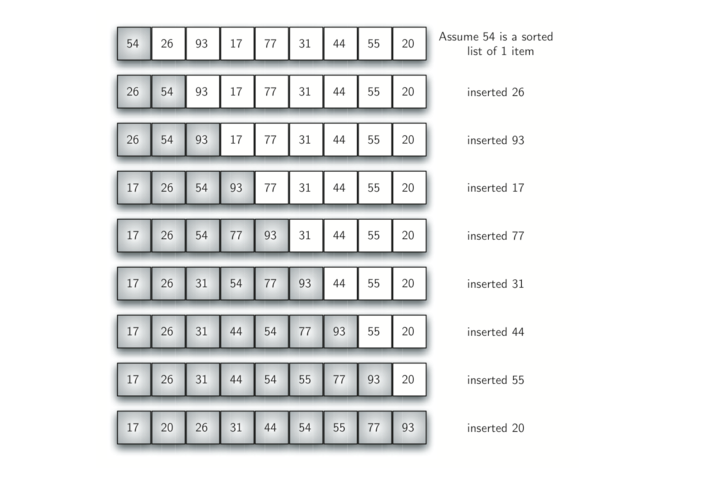

In [3]:
def insertionSort(alist):
    for index in range(1, len(alist)):
        currentvalue = alist[index]
        position = index
        while position >0 and alist[position-1]>currentvalue:
            alist[position] = alist[position-1]
            position = position-1
        alist[position] = currentvalue
alist = [54,26,93,17,77,31,44,55,20]
insertionSort(alist)
alist

[17, 20, 26, 31, 44, 54, 55, 77, 93]

### 4 希尔排序

通过将原始列表分解为多个较小的子列表来改进插入排序，每个子列表使用插入排序进行排序\
如下图，列表有9个项，\
Step 1：采用三的增量，则会产生三个子列表；\
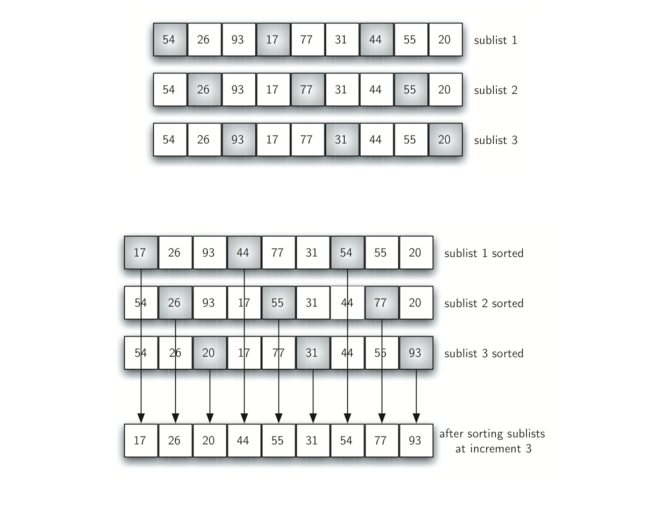\
Step 2：对每个子列表进行插入排序，此时每个项都被移动到更接近他们实际所属的位置；\
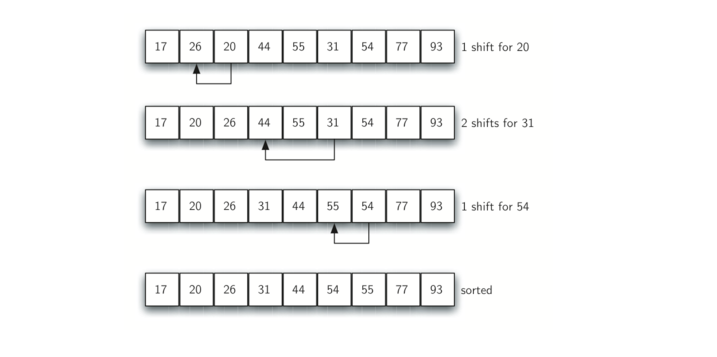\
Step 3：再对9个项使用增量为1的插入排序，那么此时我们只需四次移位即可完成排序\
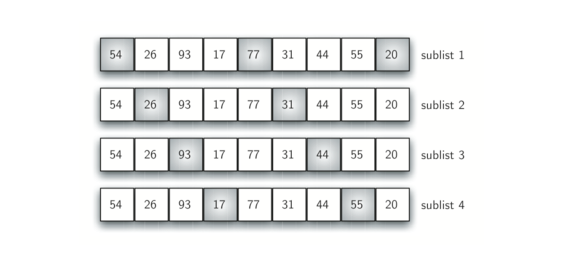

In [6]:
def shellSort(alist):
    sublistcount = len(alist)//2
    while sublistcount >0:
        for startposition in range(sublistcount):
            gapInsertionSort(alist,startposition,sublistcount)
        print("After increments of size",sublistcount,"The list is",alist)
        sublistcount = sublistcount//2
        
def gapInsertionSort(slist, start,gap):
    for i in range(start+gap, len(alist), gap):
        currentvalue = alist[i]
        position = i
        while position >= gap and alist[position-gap]>currentvalue:
            alist[position] = alist[position-gap]
            position = position-gap
        alist[position] = currentvalue

alist = [54,26,93,17,77,31,44,55,20]
shellSort(alist)
print(alist)

After increments of size 4 The list is [20, 26, 44, 17, 54, 31, 93, 55, 77]
After increments of size 2 The list is [20, 17, 44, 26, 54, 31, 77, 55, 93]
After increments of size 1 The list is [17, 20, 26, 31, 44, 54, 55, 77, 93]
[17, 20, 26, 31, 44, 54, 55, 77, 93]


### 5 归并排序

采用分而治之策略\
如果列表有多个项，我们分割列表，并递归调用两个半部分的合并排序。 \
一旦对这两半排序完成，就执行称为合并的基本操作。\
合并是获取两个较小的排序列表并将它们组合成单个排序的新列表的过程。\
Step 1：分割\
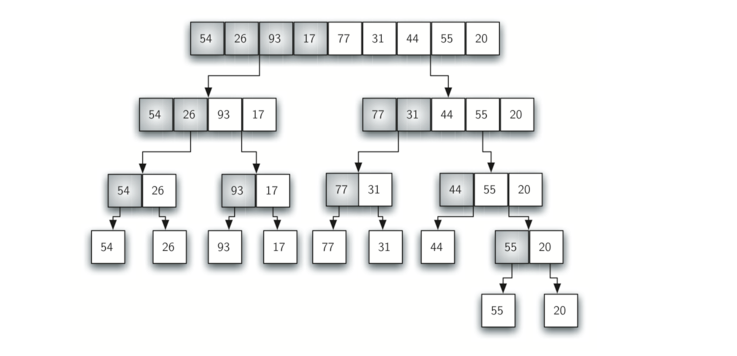\
Step 2：合并\
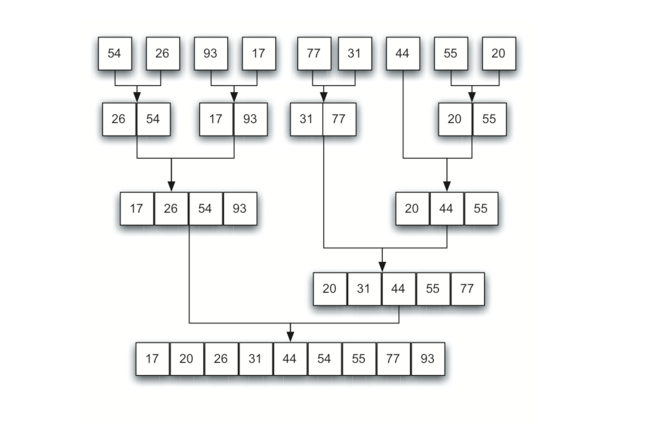\

In [14]:
def mergeSort(alist):
    print("Splitting ",alist)
    if len(alist)>1:
        mid = len(alist)//2
        lefthalf = alist[:mid]
        righthalf = alist[mid:]
        mergeSort(lefthalf)
        mergeSort(righthalf)
        i=0
        j=0
        k=0
        while i < len(lefthalf) and j < len(righthalf):
            if lefthalf[i] < righthalf[j]:
                alist[k]=lefthalf[i]
                i=i+1
            else:
                alist[k]=righthalf[j]
                j=j+1
            k=k+1
        while i < len(lefthalf):
            alist[k]=lefthalf[i]
            i=i+1
            k=k+1
        while j < len(righthalf):
            alist[k]=righthalf[j]
            j=j+1
            k=k+1
    print("Merging ",alist)
alist = [54,26,93,17,77,31,44,55,20]
mergeSort(alist)
print(alist)

Splitting  [54, 26, 93, 17, 77, 31, 44, 55, 20]
Splitting  [54, 26, 93, 17]
Splitting  [54, 26]
Splitting  [54]
Merging  [54]
Splitting  [26]
Merging  [26]
Merging  [26, 54]
Splitting  [93, 17]
Splitting  [93]
Merging  [93]
Splitting  [17]
Merging  [17]
Merging  [17, 93]
Merging  [17, 26, 54, 93]
Splitting  [77, 31, 44, 55, 20]
Splitting  [77, 31]
Splitting  [77]
Merging  [77]
Splitting  [31]
Merging  [31]
Merging  [31, 77]
Splitting  [44, 55, 20]
Splitting  [44]
Merging  [44]
Splitting  [55, 20]
Splitting  [55]
Merging  [55]
Splitting  [20]
Merging  [20]
Merging  [20, 55]
Merging  [20, 44, 55]
Merging  [20, 31, 44, 55, 77]
Merging  [17, 20, 26, 31, 44, 54, 55, 77, 93]
[17, 20, 26, 31, 44, 54, 55, 77, 93]


### 7 快速排序